In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import nltk
# import os
%matplotlib inline
# os.environ['PATH']+=os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
df = pd.read_excel("sent.xlsx")


In [2]:
df.head(2)

,id,name,asins,brand,categories,primaryCategories,keys,manufacturer,manufacturerNumber,reviews.date,...,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,imageURLs,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...


In [3]:
df.describe()

,reviews.numHelpful,reviews.rating
count,5000.000000,5000.000000
mean,0.312400,4.596800
std,3.111582,0.731804
min,0.000000,1.000000
25%,0.000000,4.000000
50%,0.000000,5.000000
75%,0.000000,5.000000
max,105.000000,5.000000


In [4]:
df1=df.copy()

In [5]:
df1.head(2)

,id,name,asins,brand,categories,primaryCategories,keys,manufacturer,manufacturerNumber,reviews.date,...,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,imageURLs,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...


In [6]:
df1.notnull().any().sum()

22

In [7]:
df1.isnull().sum().sum()

13

In [8]:
df1.isnull().sum()

id                      0
name                    0
asins                   0
brand                   0
categories              0
primaryCategories       0
keys                    0
manufacturer            0
manufacturerNumber      0
reviews.date            0
date.updated            0
date.added              0
reviews.dateSeen        0
reviews.doRecommend     0
reviews.numHelpful      0
reviews.rating          0
reviews.sourceURLs      0
reviews.text            0
reviews.title          13
reviews.username        0
imageURLs               0
sourceURLs              0
dtype: int64

In [9]:
data=df1.dropna(axis=0)

In [10]:
data.head(2)

,id,name,asins,brand,categories,primaryCategories,keys,manufacturer,manufacturerNumber,reviews.date,...,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,imageURLs,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...


### Preprocessing

In [11]:
data.isnull().sum().sum()

0

In [12]:
data.shape

(4987, 22)

In [13]:
data.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'primaryCategories',
       'keys', 'manufacturer', 'manufacturerNumber', 'reviews.date',
       'date.updated', 'date.added', 'reviews.dateSeen', 'reviews.doRecommend',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'imageURLs',
       'sourceURLs'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 0 to 4999
Data columns (total 22 columns):
id                     4987 non-null object
name                   4987 non-null object
asins                  4987 non-null object
brand                  4987 non-null object
categories             4987 non-null object
primaryCategories      4987 non-null object
keys                   4987 non-null object
manufacturer           4987 non-null object
manufacturerNumber     4987 non-null object
reviews.date           4987 non-null object
date.updated           4987 non-null object
date.added             4987 non-null object
reviews.dateSeen       4987 non-null object
reviews.doRecommend    4987 non-null bool
reviews.numHelpful     4987 non-null int64
reviews.rating         4987 non-null int64
reviews.sourceURLs     4987 non-null object
reviews.text           4987 non-null object
reviews.title          4987 non-null object
reviews.username       4987 non-null object
imageURLs        

In [15]:
data.reset_index()

,index,id,name,asins,brand,categories,primaryCategories,keys,manufacturer,manufacturerNumber,...,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,imageURLs,sourceURLs
0,0,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...
1,1,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...
2,2,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,...,2018-05-27T00:00:00Z,True,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...
3,3,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,...,2018-10-09T00:00:00Z,True,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...
4,4,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,...,2018-05-27T00:00:00Z,True,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...
5,5,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",False,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This make an excellent ebook reader. Don't exp...,Good ebook,rmwarriors,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...
6,6,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,...,2018-10-09T00:00:00Z,True,0,5,https://redsky.target.com/groot-domain-api/v1/...,"I ordered this for my daughter, as I have the ...",Light Weight - Makes a world of difference whe...,LexieCrews,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...
7,7,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics

In [16]:
data.head(2)

,id,name,asins,brand,categories,primaryCategories,keys,manufacturer,manufacturerNumber,reviews.date,...,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,imageURLs,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...


In [17]:
#data.nunique().sum()
#unique=data['id'].unique()
unique=len(data["id"].unique())
print("number of nunique :"+str(unique))

number of nunique :24


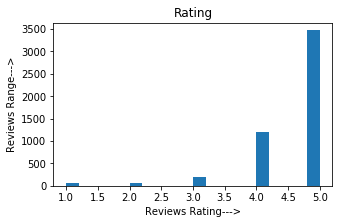

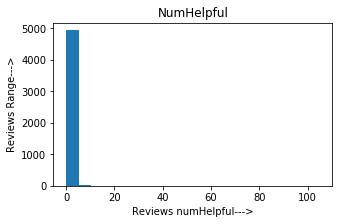

In [18]:
fig = plt.figure(figsize=(5,3))
plt.hist(data['reviews.rating'], bins=20)
plt.title("Rating")
plt.xlabel("Reviews Rating--->")
plt.ylabel("Reviews Range--->")
plt.show()

fig = plt.figure(figsize=(5,3))
plt.hist(data['reviews.numHelpful'], bins=20)
plt.title("NumHelpful")
plt.xlabel("Reviews numHelpful--->")
plt.ylabel("Reviews Range--->")

plt.show()

In [19]:
# plt.scatter(data['reviews.numHelpful'],data['reviews.rating'])
# plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['id'] = le.fit_transform(data['id'])


C:\Users\Shivshankar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
data.describe()

,id,reviews.numHelpful,reviews.rating
count,4987.000000,4987.000000,4987.000000
mean,13.483457,0.312212,4.595749
std,7.261786,3.115148,0.732467
min,0.000000,0.000000,1.000000
25%,6.000000,0.000000,4.000000
50%,14.000000,0.000000,5.000000
75%,21.000000,0.000000,5.000000
max,23.000000,105.000000,5.000000


In [22]:
data

,id,name,asins,brand,categories,primaryCategories,keys,manufacturer,manufacturerNumber,reviews.date,...,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,imageURLs,sourceURLs
0,11,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...
1,11,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...
2,11,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-20T00:00:00.000Z,...,2018-05-27T00:00:00Z,True,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...
3,11,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-11-02T17:33:31.000Z,...,2018-10-09T00:00:00Z,True,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...
4,11,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-24T00:00:00.000Z,...,2018-05-27T00:00:00Z,True,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...
5,11,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2016-12-14T00:00:00.000Z,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",False,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This make an excellent ebook reader. Don't exp...,Good ebook,rmwarriors,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...
6,11,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-12-20T17:38:23.000Z,...,2018-10-09T00:00:00Z,True,0,5,https://redsky.target.com/groot-domain-api/v1/...,"I ordered this for my daughter, as I have the ...",Light Weight - Makes a world of difference whe...,LexieCrews,https://pisces.bbystatic.com/image2/BestBuy_US...,https://www.newegg.com/Product/Product.aspx%25...
7,11,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,E

In [23]:
# data1=data[['id']]

In [24]:
# from sklearn.preprocessing import OneHotEncoder

In [25]:
# on=OneHotEncoder()
# data['id'] = on.fit_transform(data1)


### Split into Train/Test

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["reviews.rating"]) # removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

Before 4987
After 4987


In [27]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["reviews.rating"]): 
    train_x = dataAfter.reindex(train_index)
    test_x = dataAfter.reindex(test_index)

**Check to see if train/test sets were stratified proportionately in comparison to raw data.**

In [28]:
len(train_x)

3989

In [29]:
train_x["reviews.rating"].value_counts()/len(train_x) # value_count() counts all the values based on column

5.0    0.686137
4.0    0.248684
3.0    0.040612
1.0    0.012033
2.0    0.010780
Name: reviews.rating, dtype: float64

In [30]:
len(test_x)

998

In [31]:
test_x["reviews.rating"].value_counts()/len(test_x)

5.0    0.719439
4.0    0.213427
3.0    0.035070
1.0    0.015030
2.0    0.011022
Name: reviews.rating, dtype: float64

### Data Exploration (Training Set)

In [32]:
reviews = train_x.copy()
reviews.head(2)

,id,name,asins,brand,categories,primaryCategories,keys,manufacturer,manufacturerNumber,reviews.date,...,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,imageURLs,sourceURLs
4053,18.0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,"841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,53-004484,2017-01-18T00:00:00.000Z,...,"2017-04-30T00:45:00.000Z,2017-06-07T09:04:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This game seems to be another good addition to...,My son likes it,Melikey,https://i5.walmartimages.com/asr/c494506a-b347...,http://www.walmart.com/ip/All-New-Fire-HD-8-Ta...
1775,13.0,"Kindle E-reader - White, 6 Glare-Free Touchscr...",B017JG41PC,Amazon,"Office,eBook Readers,Electronics Features,Walm...","Office Supplies,Electronics","841667100418,0841667100418,amazonkindlewhite/5...",Amazon,53-004447,2018-01-21T00:00:00.000Z,...,2018-05-27T00:00:00Z,True,0.0,4.0,https://reviews.bestbuy.com/3545/5435001/revie...,I purchased this as a replacement for my older...,Great Device,danny,https://www.barcodable.com/images/barcode/0841...,https://reviews.bestbuy.com/3545/5435001/revie...


In [33]:
reviews.reset_index(inplace=True)

In [34]:
reviews=reviews.drop(columns=['index'],axis=1)

In [35]:
reviews.head(2)

,id,name,asins,brand,categories,primaryCategories,keys,manufacturer,manufacturerNumber,reviews.date,...,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,imageURLs,sourceURLs
0,18.0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,"841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,53-004484,2017-01-18T00:00:00.000Z,...,"2017-04-30T00:45:00.000Z,2017-06-07T09:04:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This game seems to be another good addition to...,My son likes it,Melikey,https://i5.walmartimages.com/asr/c494506a-b347...,http://www.walmart.com/ip/All-New-Fire-HD-8-Ta...
1,13.0,"Kindle E-reader - White, 6 Glare-Free Touchscr...",B017JG41PC,Amazon,"Office,eBook Readers,Electronics Features,Walm...","Office Supplies,Electronics","841667100418,0841667100418,amazonkindlewhite/5...",Amazon,53-004447,2018-01-21T00:00:00.000Z,...,2018-05-27T00:00:00Z,True,0.0,4.0,https://reviews.bestbuy.com/3545/5435001/revie...,I purchased this as a replacement for my older...,Great Device,danny,https://www.barcodable.com/images/barcode/0841...,https://reviews.bestbuy.com/3545/5435001/revie...


###### **Columns Exploration**

In [36]:
len(reviews["name"].unique()), len(reviews["asins"].unique())
#ASIN stands for Amazon Standard Identification Number

(24, 25)

In [37]:
reviews.groupby("asins")["name"].unique()

asins
B00IOY8XWQ          [Amazon - Kindle Voyage - 6" - 4GB - Black]
B00IOYAM4I    [Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - B...
B00QFQRELG    [Amazon 9W PowerFast Official OEM USB Charger ...
B00REQKWGA    [Kindle Oasis E-reader with Leather Charging C...
B00VINDBJK    [Kindle Oasis E-reader with Leather Charging C...
B00ZV9PXP2    [Amazon Kindle E-Reader 6" Wifi (8th Generatio...
B010CEHQTG    [Amazon Echo Show Alexa-enabled Bluetooth Spea...
B017JG41PC    [Kindle E-reader - White, 6 Glare-Free Touchsc...
B0189XYY0Q    [Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16...
B018Y224PY    [Fire Tablet with Alexa, 7" Display, 16 GB, Ma...
B018Y225IA    [Brand New Amazon Kindle Fire 16gb 7" Ips Disp...
B018Y22BI4    [Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includ...
B018Y22C2Y    [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B018Y23MNM    [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B01ACEKAJY    [All-New Fire HD 8 Tablet, 8" HD Display, Wi-F...
B01AHB9C1E    [Fire HD 8 Tablet wi

In [38]:
# Lets see all the different names for this product that have 2 ASINs
different_names = reviews[reviews["asins"] =='B01AHB9CN2']["name"].unique()
for name in different_names:
    print(name)

All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta


In [39]:
reviews[reviews["asins"] == "B01AHB9CN2"]["name"].value_counts().sum()

630

**Confirmed our hypothesis that each ASIN can have multiple names. Therefore we should only really concern ourselves with which ASINs do well, not the product names.**

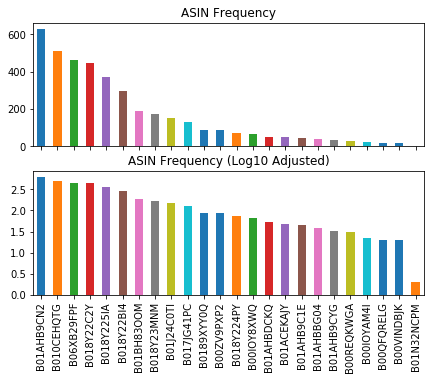

In [40]:
fig = plt.figure(figsize=(7,5))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASIN Frequency (Log10 Adjusted)") 
plt.show()

In [41]:
reviews["reviews.rating"].mean()

4.588900050226017

### reviews.rating / ASINs

C:\Users\Shivshankar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


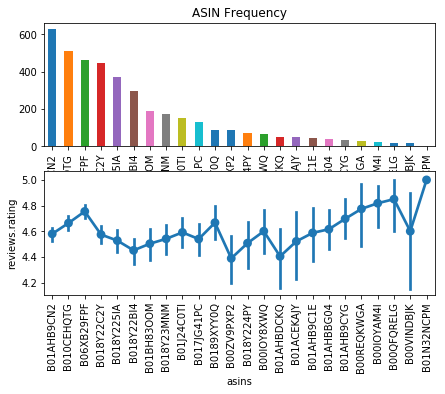

In [42]:
asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(7,5))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

### reviews.doRecommend / ASINs

C:\Users\Shivshankar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


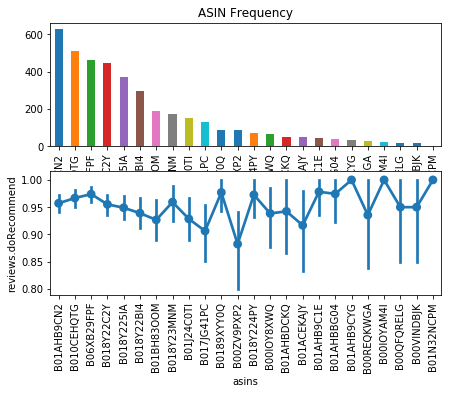

In [43]:
plt.subplots (2,1,figsize=(7,5))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

### Correlations

In [44]:
corr=data.corr()
corr

,id,reviews.doRecommend,reviews.numHelpful,reviews.rating
id,1.000000,0.042589,-0.025815,0.079359
reviews.doRecommend,0.042589,1.000000,-0.041688,0.641393
reviews.numHelpful,-0.025815,-0.041688,1.000000,-0.067469
reviews.rating,0.079359,0.641393,-0.067469,1.000000


In [45]:
corr_matrix = reviews.corr()
corr_matrix

,id,reviews.numHelpful,reviews.rating
id,1.000000,-0.022754,0.076485
reviews.numHelpful,-0.022754,1.000000,-0.074108
reviews.rating,0.076485,-0.074108,1.000000


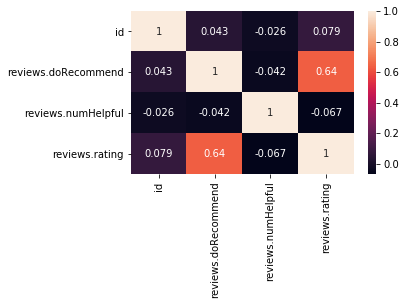

In [46]:
plt.subplots(figsize=(5,3))
sns.heatmap(corr,annot=True)

In [47]:
counts = reviews["asins"].value_counts().to_frame()
counts.head()

,asins
B01AHB9CN2,630
B010CEHQTG,511
B06XB29FPF,460
B018Y22C2Y,446
B018Y225IA,372


In [48]:
avg_rating = reviews.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()

,reviews.rating
asins,
B00IOY8XWQ,4.600000
B00IOYAM4I,4.818182
B00QFQRELG,4.850000
B00REQKWGA,4.774194
B00VINDBJK,4.600000


In [49]:
table = counts.join(avg_rating)
table.head(5)

,asins,reviews.rating
B01AHB9CN2,630,4.579365
B010CEHQTG,511,4.663405
B06XB29FPF,460,4.754348
B018Y22C2Y,446,4.573991
B018Y225IA,372,4.526882


,asins,reviews.rating
asins,1.000000,-0.167456
reviews.rating,-0.167456,1.000000


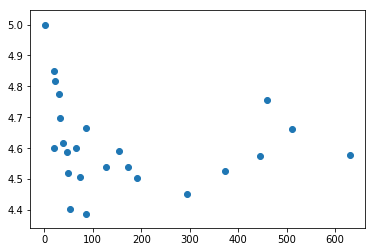

In [50]:
plt.scatter("asins", "reviews.rating", data=table)
table.corr()

### NLP

#### Tkenization

In [51]:
from nltk.tokenize import word_tokenize,sent_tokenize
data['reviews.text']= data['reviews.text'].map(lambda x:word_tokenize(x))

C:\Users\Shivshankar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
data['reviews.text']
#data.boxplot(column='reviews.rating')

0       [I, thought, it, would, be, as, big, as, small...
1       [This, kindle, is, light, and, easy, to, use, ...
2       [Didnt, know, how, much, i, 'd, use, a, kindle...
3       [I, am, 100, happy, with, my, purchase, ., I, ...
4       [Solid, entry, level, Kindle, ., Great, for, k...
5       [This, make, an, excellent, ebook, reader, ., ...
6       [I, ordered, this, for, my, daughter, ,, as, I...
7       [I, bought, my, Kindle, about, 2, months, ago,...
8       [amazon, kindle, is, always, the, best, ebook,...
9       [It, 's, beyond, my, expectation, ,, and, it, ...
10      [If, you, really, want, to, have, a, good, rea...
11      [Love, my, kindle, ,, makes, reading, at, nigh...
12      [Good, product, for, child, ., Who, only, need...
13      [This, Kindle, is, a, convenient, size, yet, l...
14      [I, use, this, every, day, on, my, commute, .,...
15      [It, does, its, job, but, I, would, buy, one, ...
16      [Great, product, for, myself, !, And, I, bough...
17      [Item,

**Removing Stopwords**

In [53]:
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))
data['reviews.text'] = data['reviews.text'].map(lambda x:[w for w in x if w not in sw])

C:\Users\Shivshankar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
data['reviews.text'].head()

0    [I, thought, would, big, small, paper, turn, l...
1    [This, kindle, light, easy, use, especially, b...
2    [Didnt, know, much, 'd, use, kindle, went, low...
3    [I, 100, happy, purchase, ., I, caught, sale, ...
4    [Solid, entry, level, Kindle, ., Great, kids, ...
Name: reviews.text, dtype: object

**Lematization**

In [55]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
data['reviews.text'] = data['reviews.text'].map(lambda x:[lem.lemmatize(word) for word in x])

C:\Users\Shivshankar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
data['reviews.text'].head()

0    [I, thought, would, big, small, paper, turn, l...
1    [This, kindle, light, easy, use, especially, b...
2    [Didnt, know, much, 'd, use, kindle, went, low...
3    [I, 100, happy, purchase, ., I, caught, sale, ...
4    [Solid, entry, level, Kindle, ., Great, kid, ....
Name: reviews.text, dtype: object

**Convert String in to lower case**

In [57]:
data['reviews.text']=data['reviews.text'].map(lambda x:(str(x).lower()))
 

C:\Users\Shivshankar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
d=data['reviews.text'] 

### Sentiment Analysis Implementation

***Sentiment Analysis-Using the features in place, we will build a Regressor/Classifier that can determine a review's sentiment.***

In [81]:
def sentiments(rating):
    if (rating == 5) or (rating == 5):
        return "Positive"
    elif rating == 4:
        return "Neutral"
    elif (rating == 3) or (rating == 1):
        return "Negative"
# Add sentiments to the data
train_x["Sentiment"] = train_x["reviews.rating"].apply(sentiments)
test_x["Sentiment"] = test_x["reviews.rating"].apply(sentiments)
train_x["Sentiment"][0:5]
 

4053    Positive
1775     Neutral
180     Positive
1602    Positive
847     Positive
Name: Sentiment, dtype: object

In [82]:
X_train = train_x["reviews.text"]
Y_train = train_x["Sentiment"]
X_test = test_x["reviews.text"]
Y_test = test_x["Sentiment"]
print(len(X_train), len(X_test))
print(len(Y_train), len(Y_test))


3989 998
3989 998


### Feature Extraction

In [83]:
# Replace "nan" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
Y_train = Y_train.fillna(' ')
Y_test = Y_test.fillna(' ')

# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(3989, 4926)

In [84]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3989, 4926)

### Pipeline

Python scikit-learn provides a Pipeline utility to help automate machine learning workflows. Pipelines work by allowing for a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated.

In [85]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
multiNB_pipe.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...alse, use_idf=True)), ('clf_nominalNB', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Model testing

**Naive Bayes Classifier**

In [86]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
multiNB_pipe.fit(X_train, Y_train)

predNB= multiNB_pipe.predict(X_test)
np.mean(predNB == Y_test)

NB=multiNB_pipe.score(X_test,Y_test)
NB

0.7214428857715431

**Logistic Regression**

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("logReg", LogisticRegression())])
logReg_pipe.fit(X_train, Y_train)

predLog = logReg_pipe.predict(X_test)
np.mean(predLog == X_test)

LG=logReg_pipe.score(X_test,Y_test)
LG


C:\Users\Shivshankar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivshankar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7374749498997996

**SVM Classifier**

In [88]:
from sklearn.svm import LinearSVC
SVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("linearSVC",LinearSVC(random_state=400))])
SVC_pipe.fit(X_train, Y_train)

predSVC= SVC_pipe.predict(X_test)
np.mean(predSVC == Y_test)

SV=SVC_pipe.score(X_test,Y_test)
SV

0.7535070140280561

**Decision Tree Classifier**

In [89]:
from sklearn.tree import DecisionTreeClassifier
DT_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), 
                                  ("decisionTree", DecisionTreeClassifier(random_state=400))])
DT_pipe.fit(X_train, Y_train)

predDT= DT_pipe.predict(X_test)
np.mean(predDT == Y_test)

DT=DT_pipe.score(X_test,Y_test)
DT

0.7234468937875751

**Random Forest Classifier**

In [90]:
from sklearn.ensemble import RandomForestClassifier
RF_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), 
                                  ("randomforest", RandomForestClassifier(random_state=400))])
RF_pipe.fit(X_train, Y_train)
predRF=RF_pipe.predict(X_test)
np.mean(predRF == Y_test)

RF=RF_pipe.score(X_test,Y_test)
RF

C:\Users\Shivshankar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7785571142284569

**All Model Accuracy**

In [91]:
AllScore=[['Naive Bayes',NB],["Logistic",LG],["SVC",SV],["DecisionTree",DT],["RandomForest",RF]]

In [92]:
show= pd.DataFrame(AllScore, columns = ['Model', 'Accuracy'])
show

,Model,Accuracy
0,Naive Bayes,0.721443
1,Logistic,0.737475
2,SVC,0.753507
3,DecisionTree,0.723447
4,RandomForest,0.778557


In [98]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],    
             'tfidf__use_idf': (True, False), 
             } 
gs_SVC_pipe = GridSearchCV(SVC_pipe, parameters, n_jobs=-1)
gs_SVC_pipe = gs_SVC_pipe.fit(X_train,Y_train)
new_text = ["this is a steal, have 8 gb model as well.This has more punch.."]
              
Y_train[gs_SVC_pipe.predict(new_text)]

C:\Users\Shivshankar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Positive    NaN
Name: Sentiment, dtype: object

In [99]:
predictedGS_SVC_pipe = gs_SVC_pipe.predict(Y_test)
np.mean(predictedGS_SVC_pipe == Y_test)

0.7194388777555111

- After testing some arbitrary reviews, it seems that our features is performing correctly with Positive, Neutral, Negative results
- We also see that after running the grid search, our Support Vector Machine Classifier has improved to **70<%** accuracy level

### Analysis of SVMC


Analyze the best mean score of the grid search (classifier, parameters, CPU core)
Analyze the best estimator
Analyze the best parameter

In [100]:
for performance_analysis in (gs_SVC_pipe.best_score_,gs_SVC_pipe.best_estimator_,gs_SVC_pipe.best_params_):
    print(performance_analysis)

0.7392830283279017
Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=400, tol=0.0001,
     verbose=0))])
{'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


In [101]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(Y_test, predictedGS_SVC_pipe))
print('Accuracy: {}'. format(accuracy_score(Y_test, predictedGS_SVC_pipe)))


              precision    recall  f1-score   support

                   0.00      0.00      0.00        17
    Negative       0.00      0.00      0.00        50
     Neutral       0.00      0.00      0.00       213
    Positive       0.72      1.00      0.84       718

   micro avg       0.72      0.72      0.72       998
   macro avg       0.18      0.25      0.21       998
weighted avg       0.52      0.72      0.60       998

Accuracy: 0.7194388777555111


C:\Users\Shivshankar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shivshankar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shivshankar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [97]:
# from sklearn import tree

In [ ]:
#!pip install graphviz

In [ ]:
# Rdf=tree.export_graphviz(RF,out_file='tree.dot',feature_names=Y_train.columns,max_depth=10,filled=True)